In [1]:
import cv2
from google.colab.patches import cv2_imshow

# Practice concept on black-white image

In [16]:
data = np.zeros( (512,512,1), dtype=np.uint8)

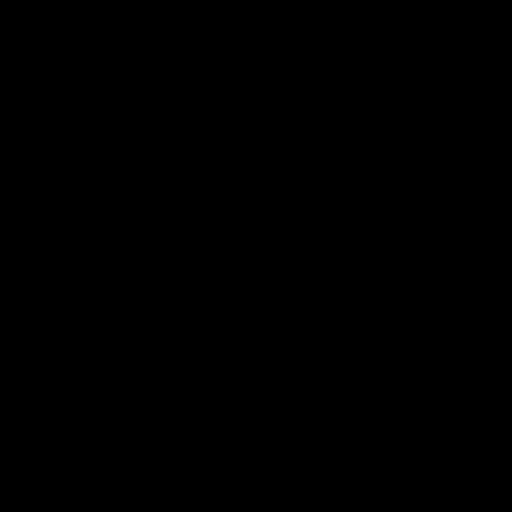

In [23]:
cv2_imshow(data)

In [24]:
data[:,256:] = 100

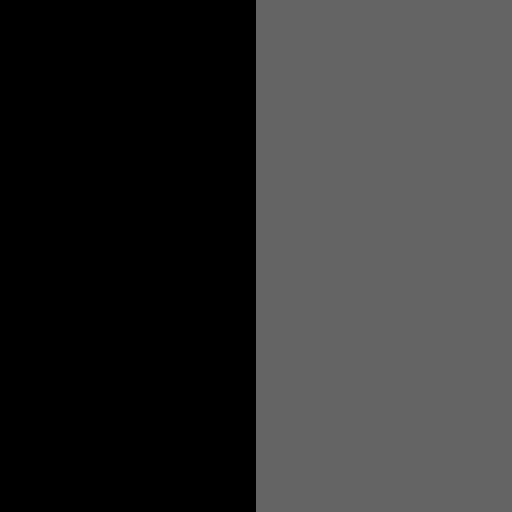

In [73]:
cv2_imshow(data)

In [26]:
edge_x = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

In [28]:
edge_y = edge_x.T
edge_y

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [77]:
import math

new_img = data.copy()
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        try:
            x_avg = np.multiply(data[i-1:i+2, j-1:j+2], edge_x).sum()
            y_avg = np.multiply(data[i-1:i+2, j-1:j+2], edge_y).sum()
            avg = math.sqrt((x_avg**2) + (y_avg**2))
            new_img[i,j] = avg 
        except:
            # image edges won't be included (doesn't really matter of real images)
            pass

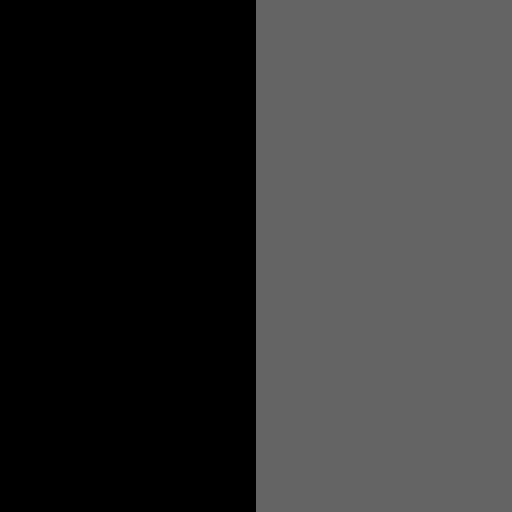

In [78]:
cv2_imshow(data)

In [80]:
new_img.shape

(512, 512, 1)

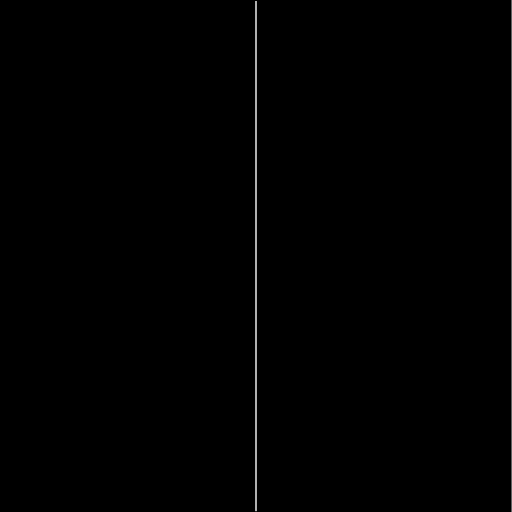

In [79]:
cv2_imshow(new_img)

# Test on real image

In [140]:
img = cv2.imread('test1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5) 

In [141]:
import math

new_img = img.copy()
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        try:
            x_avg = np.multiply(img[i-1:i+2, j-1:j+2], edge_x).sum()
            y_avg = np.multiply(img[i-1:i+2, j-1:j+2], edge_y).sum()
            avg = math.sqrt((x_avg**2) + (y_avg**2))
            new_img[i,j] = avg 
        except:
            # image edges won't be included (doesn't really matter of real images)
            pass

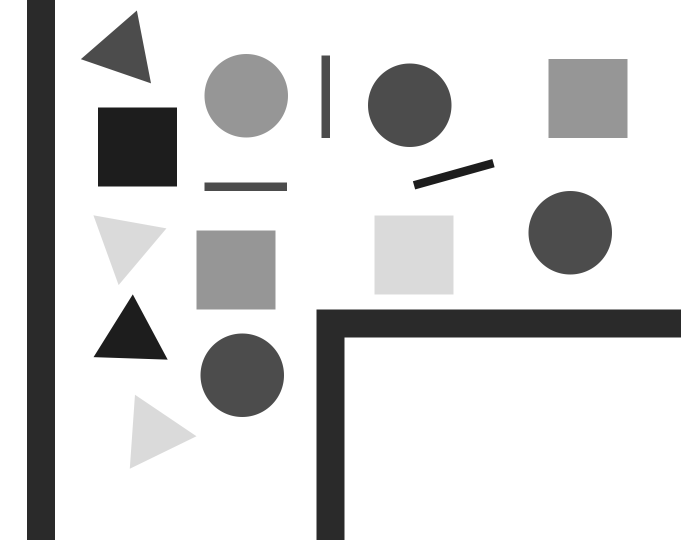

In [142]:
cv2_imshow(img)

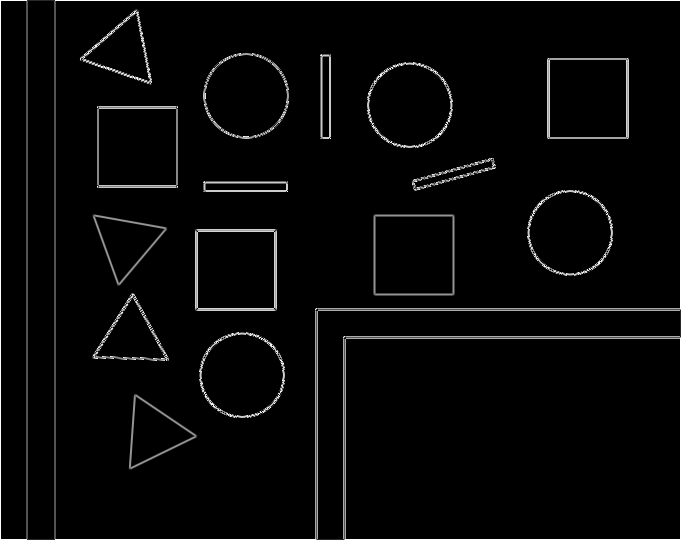

In [143]:
cv2_imshow(new_img)

In [144]:
img.shape

(540, 681)

In [145]:
new_img.shape

(540, 681)

In [146]:
import pandas as pd
dataset = pd.DataFrame({'original image pixcels dist.': img.ravel(), 'edge detected image pixcels dist.': new_img.ravel()})

In [147]:
dataset

,original image pixcels dist.,edge detected image pixcels dist.
0,255,255
1,255,255
2,255,255
3,255,255
4,255,255
...,...,...
367735,255,255
367736,255,255
367737,255,255
367738,255,255


In [148]:
dataset['edge detected image pixcels dist.'].unique()

array([255,  42,   0,  84,  43,  62,  83, 116, 161,  49,  16, 114, 194,
       240,  54,  91,   2, 149,   3, 248,  50, 200, 211, 197,  11, 191,
        66, 247, 242, 140, 141, 217,  75,  24, 237, 121, 236, 177, 106,
         5, 213,  33, 167, 214, 113,  76, 135, 207,  87, 203, 183,  55,
       154, 180,  70,  94, 153, 228,   1,  31, 215, 179, 127, 218, 243,
       208,  15, 165,  29,  26, 193, 209,  90, 244, 152,   7, 150,  93,
        52, 171,  58,  89,  65,  61, 212, 160, 184,  48, 169, 172,   8,
       158,  46,  21, 226, 109,   9,  80, 143,  36,  20, 157, 220, 129,
       204,  13,  59,  74,  68,  56,  67,  86, 136, 223,  35, 190, 216,
        30, 118, 201, 241, 103,  19,  79, 186, 144,   4, 155,  12, 175,
        98, 125, 198, 246, 234, 225, 250, 245, 128, 233, 101, 130,  45,
        41, 173, 210, 105,  72,  69,  47,  92, 131,  28,  97, 231, 134,
        82, 202,  14, 230, 159, 110,  96, 123, 227,  32,   6, 145, 108,
       199, 115,  53, 185, 163, 232,  22, 251,  39,  25, 187, 14